# Кейс 2: Анализ и визуализация данных

Компания доставляет интернет-заказы в городе А. Клиент может выкупить заказ полностью, частично или отказаться от заказа.  
Город разделен на территории, в часть из них доставка не осуществляется. Все «покрытые» районы уже дают максимально возможное количество заказов, на которое способны. Поэтому в компании задумались о том, чтобы расширить зону доставки. Был проведен тест, который позволил получить данные за некоторый период времени о заказах в остальных районах города.  
Теперь руководителю компании нужно принять решение, в какой район города выходить в первую очередь, за этим они обратились в отдел аналитики.

## Ваша задача:
- Проанализировать имеющуюся информацию о районах.
- Сделать предложение о том, с какого района начать расширение и почему.
- Подготовить презентацию по первым двум пунктам и краткую аналитическую записку.

Задание можно выполнить в **Excel/Power BI** или **Python/R** (если умеете).


In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

from matplotlib import pyplot as plt

import seaborn as sns

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Тестовое задание Lamoda delivery.xlsm')

In [5]:
df.head()

,Postcode,Delivery date,Orders_shipped,Orders_delivered,Value_shipped,Value_delivered
0,111111,43498.26042,1,0,833.33330,0.00000
1,111111,43500.92639,1,0,21600.00000,0.00000
2,111111,43504.91667,1,0,5929.16670,0.00000
3,111111,43507.94653,2,2,3315.41665,1440.41665
4,111111,43509.97083,2,2,9510.00000,1632.91670


In [6]:
list(df)

['Postcode',
 'Delivery date',
 'Orders_shipped',
 'Orders_delivered',
 'Value_shipped',
 'Value_delivered']

- Postcode — Почтовый индекс
- Delivery date — Дата доставки
- Orders_shipped — Отправленные заказы
- Orders_delivered — Доставленные заказы
- Value_shipped — Стоимость отгруженного товара
- Value_delivered — Стоимость доставки заказов

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
df_new=df[(df['value_delivered']==0)]
df_new

,postcode,delivery_date,orders_shipped,orders_delivered,value_shipped,value_delivered
0,111111,43498.26042,1,0,833.33330,0.0
1,111111,43500.92639,1,0,21600.00000,0.0
2,111111,43504.91667,1,0,5929.16670,0.0
9,111111,43513.97708,2,0,5569.58335,0.0
15,111111,43523.92500,1,0,4075.00000,0.0
17,111111,43525.96667,1,0,3250.00000,0.0
27,111111,43546.89097,1,0,1890.83330,0.0
29,111111,43551.96319,1,0,5948.33340,0.0
34,111111,43557.45972,1,1,2100.00000,0.0
57,111111,43591.96250,1,0,1600.00000,0.0


In [9]:
df_new.groupby('postcode')['value_shipped'].sum()

,value_shipped
postcode,
111111,120555.41655
111112,18708.23460
111113,24397.49990
111114,30006.13640
111115,61073.33330
111116,29720.00000


In [10]:
df.duplicated().sum()

0

<Axes: >

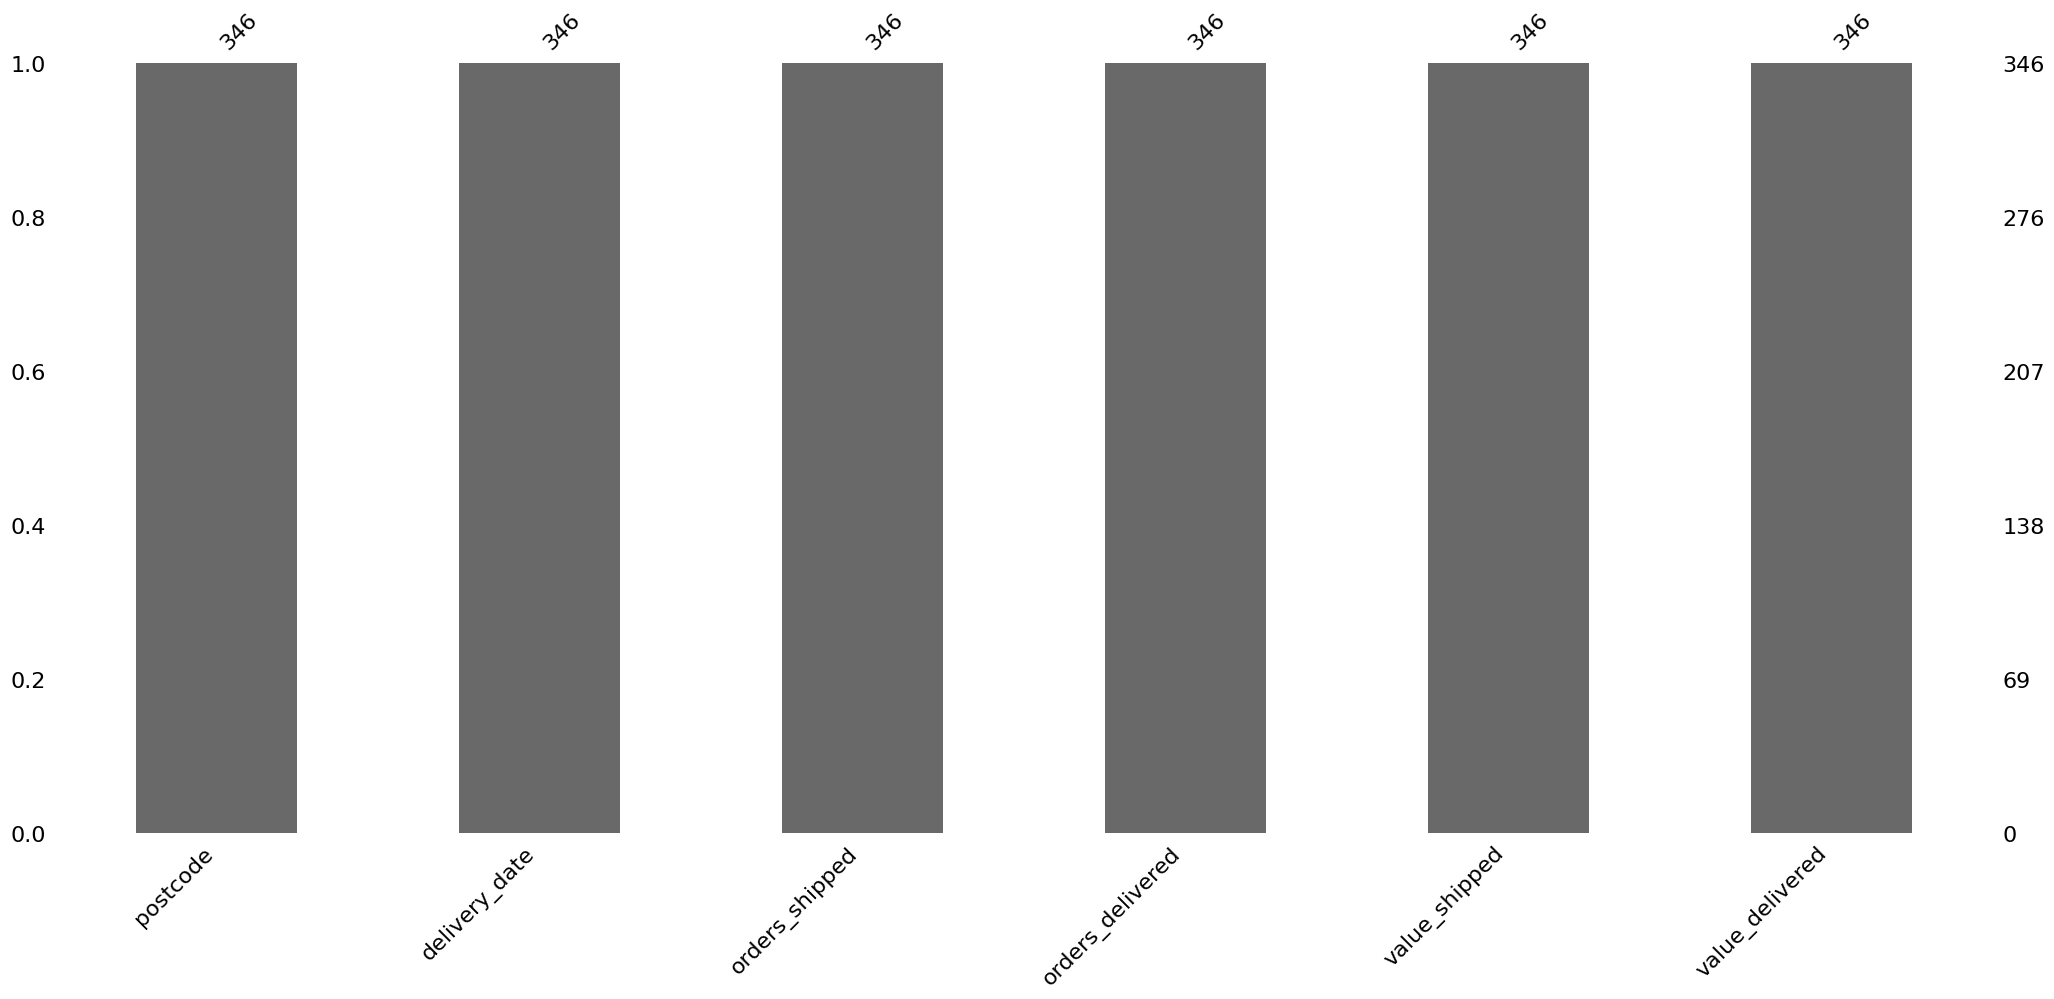

In [11]:
msno.bar(df, labels=True)

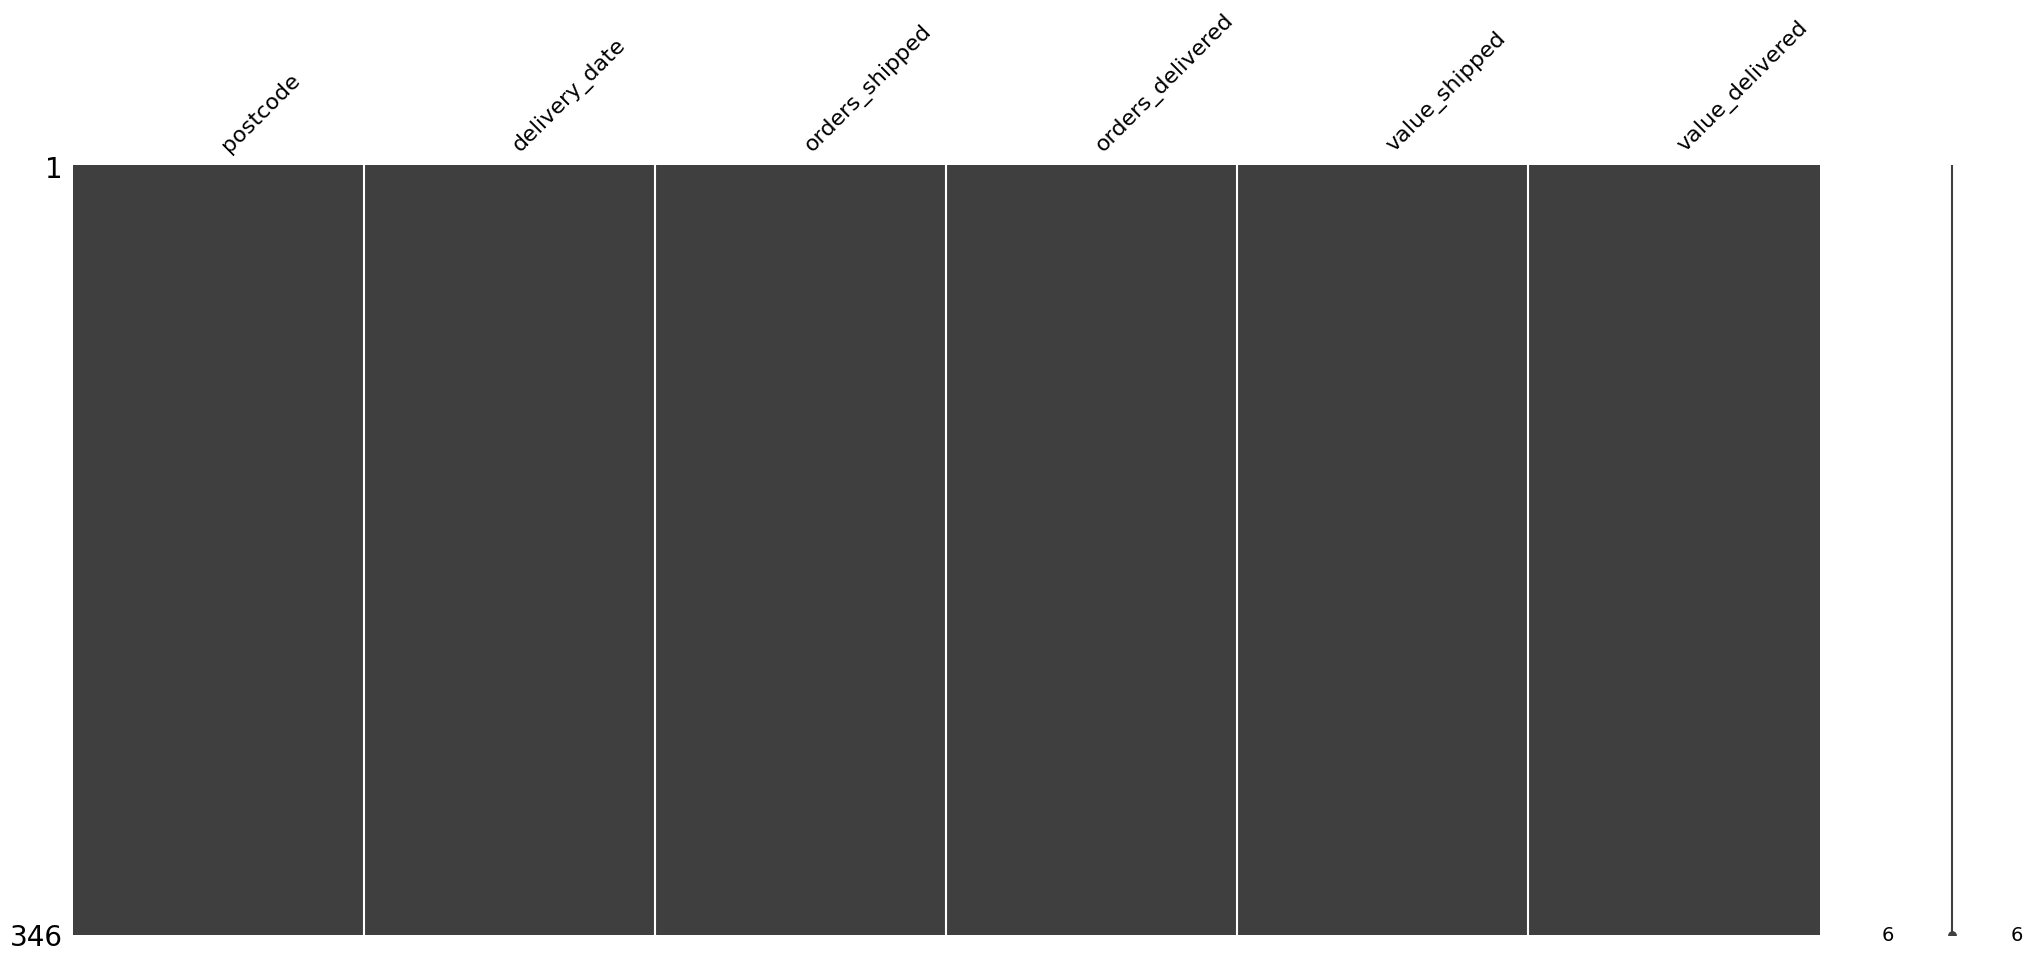

In [12]:
msno.matrix(df);

Данные пропусков не имеют.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   postcode          346 non-null    int64  
 1   delivery_date     346 non-null    float64
 2   orders_shipped    346 non-null    int64  
 3   orders_delivered  346 non-null    int64  
 4   value_shipped     346 non-null    float64
 5   value_delivered   346 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 16.3 KB


In [14]:
df.head(1)

,postcode,delivery_date,orders_shipped,orders_delivered,value_shipped,value_delivered
0,111111,43498.26042,1,0,833.3333,0.0


In [15]:
df['postcode'] = df['postcode'].astype(str)
df['delivery_date'] = pd.to_datetime(df['delivery_date'], unit='d', origin='1899-12-30')

In [16]:
print(df.dtypes)

postcode                    object
delivery_date       datetime64[ns]
orders_shipped               int64
orders_delivered             int64
value_shipped              float64
value_delivered            float64
dtype: object


In [17]:
df

,postcode,delivery_date,orders_shipped,orders_delivered,value_shipped,value_delivered
0,111111,2019-02-02 06:15:00.288000000,1,0,833.33330,0.00000
1,111111,2019-02-04 22:14:00.096000000,1,0,21600.00000,0.00000
2,111111,2019-02-08 22:00:00.288000000,1,0,5929.16670,0.00000
3,111111,2019-02-11 22:43:00.192000000,2,2,3315.41665,1440.41665
4,111111,2019-02-13 23:17:59.711999744,2,2,9510.00000,1632.91670
...,...,...,...,...,...,...
341,111116,2019-04-27 08:26:00.096000256,1,0,2332.50000,2332.50000
342,111116,2019-05-24 14:37:00.192000000,1,0,1499.16680,1499.16680
343,111116,2019-06-09 15:49:00.192000256,1,0,2747.49990,2747.49990
344,111116,2019-06-12 08:51:59.616000256,1,0,2913.33330,2913.33330


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   postcode          346 non-null    object        
 1   delivery_date     346 non-null    datetime64[ns]
 2   orders_shipped    346 non-null    int64         
 3   orders_delivered  346 non-null    int64         
 4   value_shipped     346 non-null    float64       
 5   value_delivered   346 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 16.3+ KB


In [19]:
df.describe()

,delivery_date,orders_shipped,orders_delivered,value_shipped,value_delivered
count,346,346.000000,346.000000,346.000000,346.000000
mean,2019-04-11 11:01:28.414335232,1.251445,0.994220,6588.916242,4165.064858
min,2019-02-01 06:00:00,1.000000,0.000000,291.666700,0.000000
25%,2019-03-05 18:55:14.952000,1.000000,1.000000,2334.791662,1249.166700
50%,2019-04-12 13:17:30.048000,1.000000,1.000000,4210.833350,2579.583300
75%,2019-05-17 15:47:59.064000,1.000000,1.000000,8355.416625,4829.166650
max,2019-06-13 20:26:59.711999744,5.000000,4.000000,42365.833300,42365.833300
std,NaN,0.530584,0.650504,6837.464031,5364.122900


array([[<Axes: title={'center': 'delivery_date'}>,
        <Axes: title={'center': 'orders_shipped'}>],
       [<Axes: title={'center': 'orders_delivered'}>,
        <Axes: title={'center': 'value_shipped'}>],
       [<Axes: title={'center': 'value_delivered'}>, <Axes: >]],
      dtype=object)

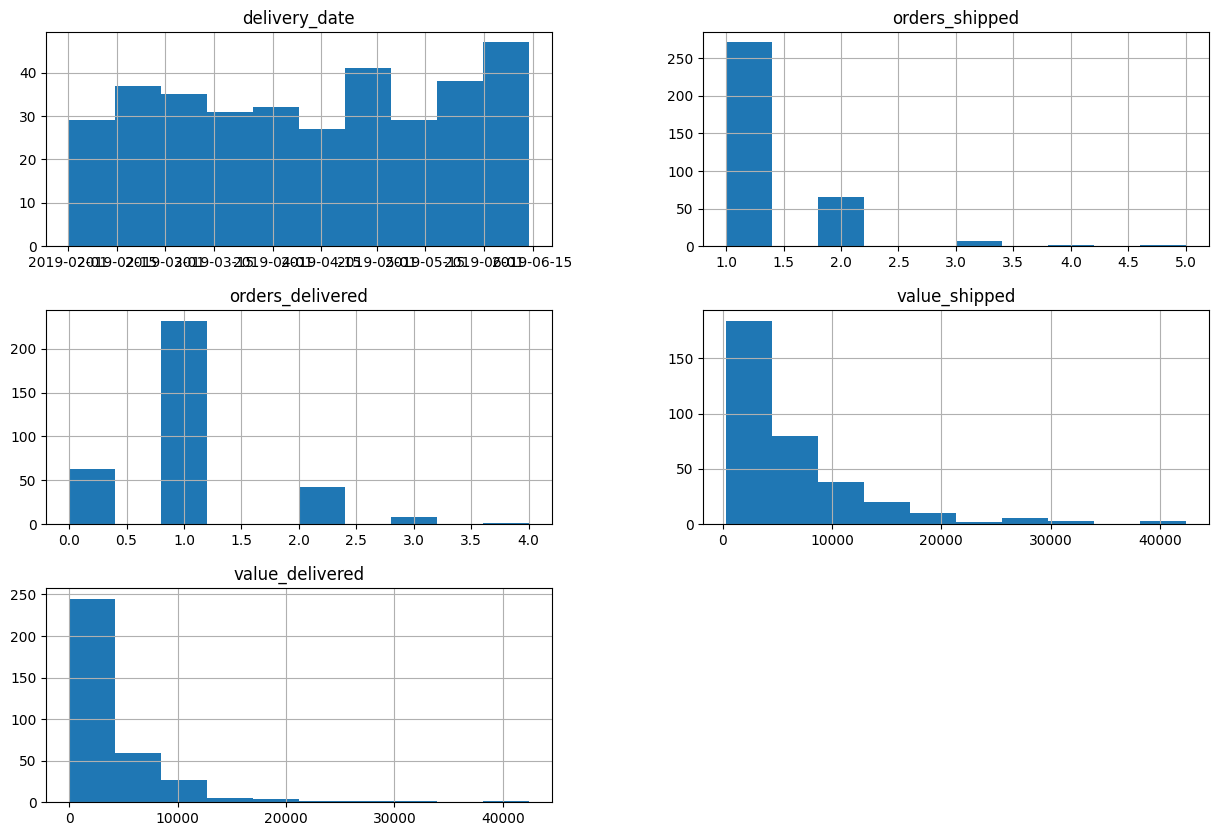

In [20]:
#построим гистограммы для всех числовых столбцов таблицы
df.hist(figsize=(15, 10))

In [21]:
df['value_shipped'].median()

4210.83335

In [22]:
df['value_delivered'].median()

2579.5833000000002

In [23]:
f"Уникальные значения postcode: {sorted(df['postcode'].unique())}"

"Уникальные значения postcode: ['111111', '111112', '111113', '111114', '111115', '111116']"

In [24]:
f"Уникальные значения orders_shipped: {sorted(df['orders_shipped'].unique())}"

'Уникальные значения orders_shipped: [1, 2, 3, 4, 5]'

In [25]:
f"Уникальные значения orders_delivered: {sorted(df['orders_delivered'].unique())}"

'Уникальные значения orders_delivered: [0, 1, 2, 3, 4]'

In [26]:
df.groupby('postcode')['value_shipped'].sum().sort_values()

,value_shipped
postcode,
111116,64936.666900
111112,75370.851300
111114,145570.815800
111113,316907.841150
111111,755560.530800
111115,921418.313764


In [27]:
df.groupby('orders_shipped')['orders_shipped'].count()

,orders_shipped
orders_shipped,
1,271
2,66
3,7
4,1
5,1


В датасете содержатся данные за период с 2019-02-01 по 2019-06-13.

In [28]:
df[(df['orders_shipped'] >= 3)]

,postcode,delivery_date,orders_shipped,orders_delivered,value_shipped,value_delivered
94,111112,2019-05-31 23:15:59.616000000,3,3,18365.674900,1492.000000
97,111112,2019-04-03 23:01:00.191999744,5,3,8982.500000,4266.666700
181,111115,2019-02-07 06:04:59.808000256,3,3,1481.994967,1481.994967
198,111115,2019-02-19 06:17:59.999999744,4,4,11792.083300,11792.083300
200,111115,2019-02-20 06:02:59.711999744,3,3,4370.833333,4370.833333
228,111115,2019-03-06 08:51:00.000000000,3,3,4010.833367,4010.833367
308,111115,2019-05-24 08:21:59.904000000,3,3,11953.611100,11953.611100
312,111115,2019-05-28 08:23:00.383999744,3,3,6275.555567,6275.555567
322,111115,2019-06-08 08:39:00.287999744,3,3,13027.500030,13027.500030


Более трех отправленных заказов за раз всего в 2 районах:
111112 – отправили 2 раза и 111115 – отправили 7 раз

- Postcode — Почтовый индекс
- Delivery date — Дата доставки
- Orders_shipped — Отправленные заказы
- Orders_delivered — Доставленные заказы
- Value_shipped — Стоимость отгруженного товара
- Value_delivered — Стоимость доставки заказов


In [29]:
#добавим столбец с итоговой стоимостью заказа (стоимость отгруженного товара + стоимость доставки заказов)
df['total_values'] = df['value_shipped']+df['value_delivered']

In [30]:
f"Процент недоставленных заказов {100 * (df[df['orders_delivered'] == 0].shape[0] / df.shape[0]):.2f}%"

'Процент недоставленных заказов 18.21%'

<b>Общий процент недоставленных товаров 18.2%.</b> Процент достаточно большой, практически 5 часть заказов не доставляется. Это может быть вызвано как логистическими проблемами, так и недобросовестностью сотрудников, а также рядом других факторов. Рекомендую провести дополнительное исследование на эту тему.

In [31]:
pivot = df.pivot_table(index='postcode',
                       values=['orders_shipped', 'orders_delivered', 'value_shipped', 'value_delivered'], aggfunc='sum'
                      )

In [32]:
pivot

,orders_delivered,orders_shipped,value_delivered,value_shipped
postcode,,,,
111111,86,117,217618.825750,755560.530800
111112,16,22,32235.129100,75370.851300
111113,45,53,203363.674300,316907.841150
111114,12,21,115564.679400,145570.815800
111115,178,204,837113.465314,921418.313764
111116,7,16,35216.666900,64936.666900


In [33]:
pivot['percentage_deliv'] = pivot['orders_delivered'] / pivot['orders_shipped'] * 100 #процент доставленных товаров
pivot['percentage_undeliv'] = 100 - pivot['percentage_deliv'] #процент недоставленных товаров

In [34]:
pivot

,orders_delivered,orders_shipped,value_delivered,value_shipped,percentage_deliv,percentage_undeliv
postcode,,,,,,
111111,86,117,217618.825750,755560.530800,73.504274,26.495726
111112,16,22,32235.129100,75370.851300,72.727273,27.272727
111113,45,53,203363.674300,316907.841150,84.905660,15.094340
111114,12,21,115564.679400,145570.815800,57.142857,42.857143
111115,178,204,837113.465314,921418.313764,87.254902,12.745098
111116,7,16,35216.666900,64936.666900,43.750000,56.250000


In [35]:
pivot['value_total'] = round(pivot['value_shipped'] + pivot['value_delivered']) #итоговая стоимость заказов с доставкой

In [36]:
pivot

,orders_delivered,orders_shipped,value_delivered,value_shipped,percentage_deliv,percentage_undeliv,value_total
postcode,,,,,,,
111111,86,117,217618.825750,755560.530800,73.504274,26.495726,973179.0
111112,16,22,32235.129100,75370.851300,72.727273,27.272727,107606.0
111113,45,53,203363.674300,316907.841150,84.905660,15.094340,520272.0
111114,12,21,115564.679400,145570.815800,57.142857,42.857143,261135.0
111115,178,204,837113.465314,921418.313764,87.254902,12.745098,1758532.0
111116,7,16,35216.666900,64936.666900,43.750000,56.250000,100153.0


In [37]:
pivot['value_total'].sum()

3720877.0

Процент итоговая стоимость заказов с доставкой в 111115 район самый большой и составляет 47,3% от общей стоимости заказов с доставкой во все районы.

<ipython-input-38-8de0efeb507c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_sorted.index, y=pivot_sorted['value_total'], palette='viridis')


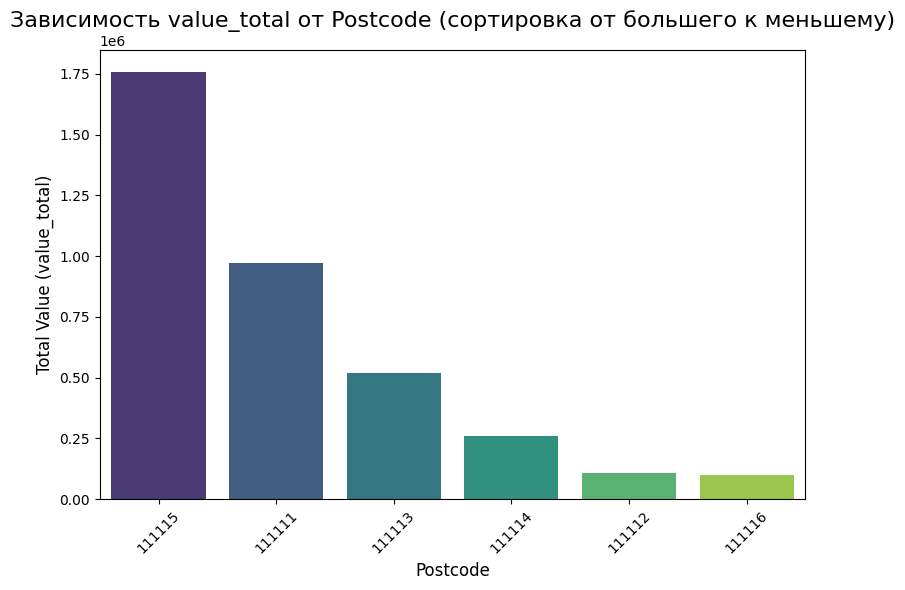

In [38]:
# Сортируем данные по value_total в порядке убывания
pivot_sorted = pivot.sort_values(by='value_total', ascending=False)

# Строим график
plt.figure(figsize=(8, 6))
sns.barplot(x=pivot_sorted.index, y=pivot_sorted['value_total'], palette='viridis')

# Добавляем подписи к графику
plt.title('Зависимость value_total от Postcode (сортировка от большего к меньшему)', fontsize=16)
plt.xlabel('Postcode', fontsize=12)
plt.ylabel('Total Value (value_total)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Отображаем график
plt.show()

2 самых больших по объему (стоимость отгруженных товаров + стоимость доставки заказов) районов:
- 111115 – 1 758 532
- 111111 – 973 179

<ipython-input-39-09ade97f2674>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_sorted.index, y=pivot_sorted['percentage_undeliv'], palette='viridis')


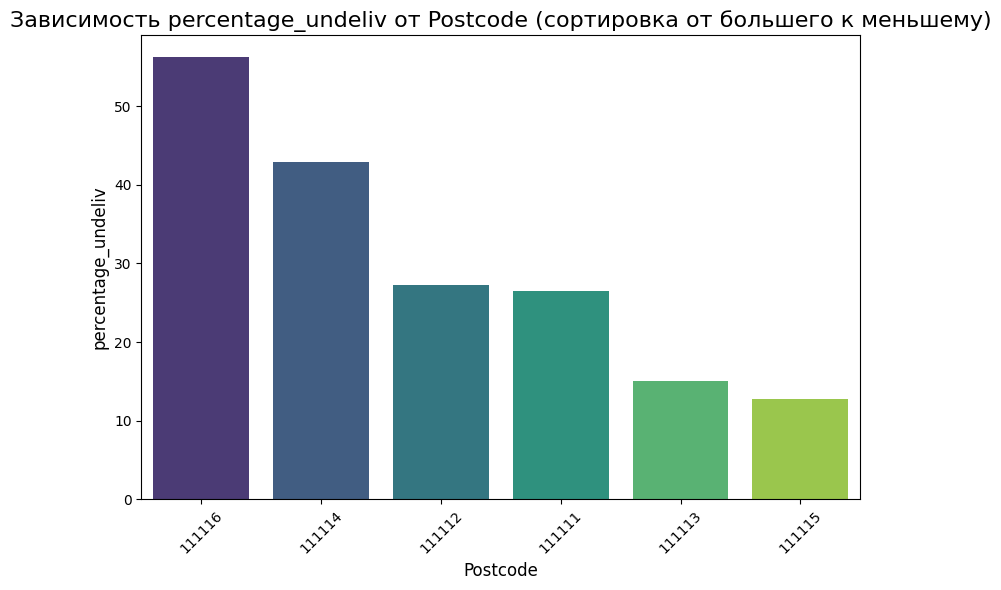

In [39]:
# Сортируем данные по value_total в порядке убывания
pivot_sorted = pivot.sort_values(by='percentage_undeliv', ascending=False)

# Строим график
plt.figure(figsize=(8, 6))
sns.barplot(x=pivot_sorted.index, y=pivot_sorted['percentage_undeliv'], palette='viridis')

# Добавляем подписи к графику
plt.title('Зависимость percentage_undeliv от Postcode (сортировка от большего к меньшему)', fontsize=16)
plt.xlabel('Postcode', fontsize=12)
plt.ylabel('percentage_undeliv', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Отображаем график
plt.show()

При том, процент недоставленных товаров среди всех районов самый низкий у:
- 111115 - 12.7%
- 111113 - 15.1%
- 111111 - 26.5%


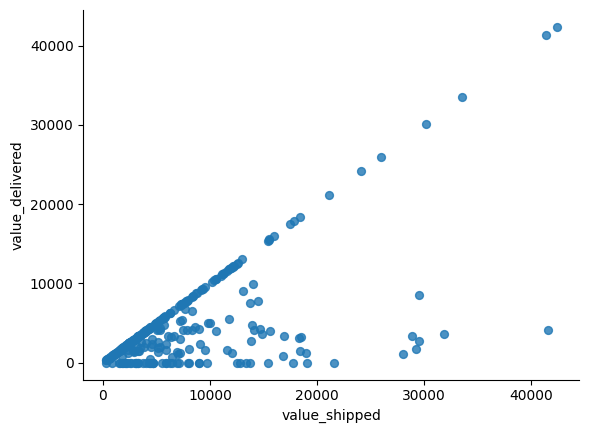

In [40]:
#value_shipped vs value_delivered
df.plot(kind='scatter', x='value_shipped', y='value_delivered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Линейная зависимость между стоимостью товара и стоимостью доставки – чем дороже товар, тем дороже доставка. Стоимость доставки не превышает стоимости товара.

In [41]:
time_analysis = df[['delivery_date', 'orders_shipped', 'orders_delivered']]

In [42]:
time_analysis

,delivery_date,orders_shipped,orders_delivered
0,2019-02-02 06:15:00.288000000,1,0
1,2019-02-04 22:14:00.096000000,1,0
2,2019-02-08 22:00:00.288000000,1,0
3,2019-02-11 22:43:00.192000000,2,2
4,2019-02-13 23:17:59.711999744,2,2
...,...,...,...
341,2019-04-27 08:26:00.096000256,1,0
342,2019-05-24 14:37:00.192000000,1,0
343,2019-06-09 15:49:00.192000256,1,0
344,2019-06-12 08:51:59.616000256,1,0


In [43]:
time_analysis['delivery_date_previous_hour'] = time_analysis['delivery_date'].dt.floor('H')

<ipython-input-43-2ae9cc91f8df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_analysis['delivery_date_previous_hour'] = time_analysis['delivery_date'].dt.floor('H')


In [44]:
time_analysis

,delivery_date,orders_shipped,orders_delivered,delivery_date_previous_hour
0,2019-02-02 06:15:00.288000000,1,0,2019-02-02 06:00:00
1,2019-02-04 22:14:00.096000000,1,0,2019-02-04 22:00:00
2,2019-02-08 22:00:00.288000000,1,0,2019-02-08 22:00:00
3,2019-02-11 22:43:00.192000000,2,2,2019-02-11 22:00:00
4,2019-02-13 23:17:59.711999744,2,2,2019-02-13 23:00:00
...,...,...,...,...
341,2019-04-27 08:26:00.096000256,1,0,2019-04-27 08:00:00
342,2019-05-24 14:37:00.192000000,1,0,2019-05-24 14:00:00
343,2019-06-09 15:49:00.192000256,1,0,2019-06-09 15:00:00
344,2019-06-12 08:51:59.616000256,1,0,2019-06-12 08:00:00


In [45]:
time_analysis = time_analysis.groupby('delivery_date_previous_hour').agg({
    'orders_shipped': 'sum',
    'orders_delivered': 'sum'
})

In [46]:
time_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 299 entries, 2019-02-01 06:00:00 to 2019-06-13 20:00:00
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   orders_shipped    299 non-null    int64
 1   orders_delivered  299 non-null    int64
dtypes: int64(2)
memory usage: 7.0 KB


In [47]:
time_analysis

,orders_shipped,orders_delivered
delivery_date_previous_hour,,
2019-02-01 06:00:00,1,1
2019-02-01 08:00:00,1,0
2019-02-02 06:00:00,3,0
2019-02-02 08:00:00,1,0
2019-02-03 06:00:00,1,0
...,...,...
2019-06-12 17:00:00,1,1
2019-06-13 08:00:00,1,0
2019-06-13 16:00:00,1,0


In [48]:
#Проверим, является ли индекс DataFrame (df) монотонным
print(time_analysis.index.is_monotonic_increasing)

True


In [49]:
time_analysis = time_analysis.resample('1H').sum()
time_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3183 entries, 2019-02-01 06:00:00 to 2019-06-13 20:00:00
Freq: H
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   orders_shipped    3183 non-null   int64
 1   orders_delivered  3183 non-null   int64
dtypes: int64(2)
memory usage: 74.6 KB


In [50]:
time_analysis

,orders_shipped,orders_delivered
delivery_date_previous_hour,,
2019-02-01 06:00:00,1,1
2019-02-01 07:00:00,0,0
2019-02-01 08:00:00,1,0
2019-02-01 09:00:00,0,0
2019-02-01 10:00:00,0,0
...,...,...
2019-06-13 16:00:00,1,0
2019-06-13 17:00:00,0,0
2019-06-13 18:00:00,2,0


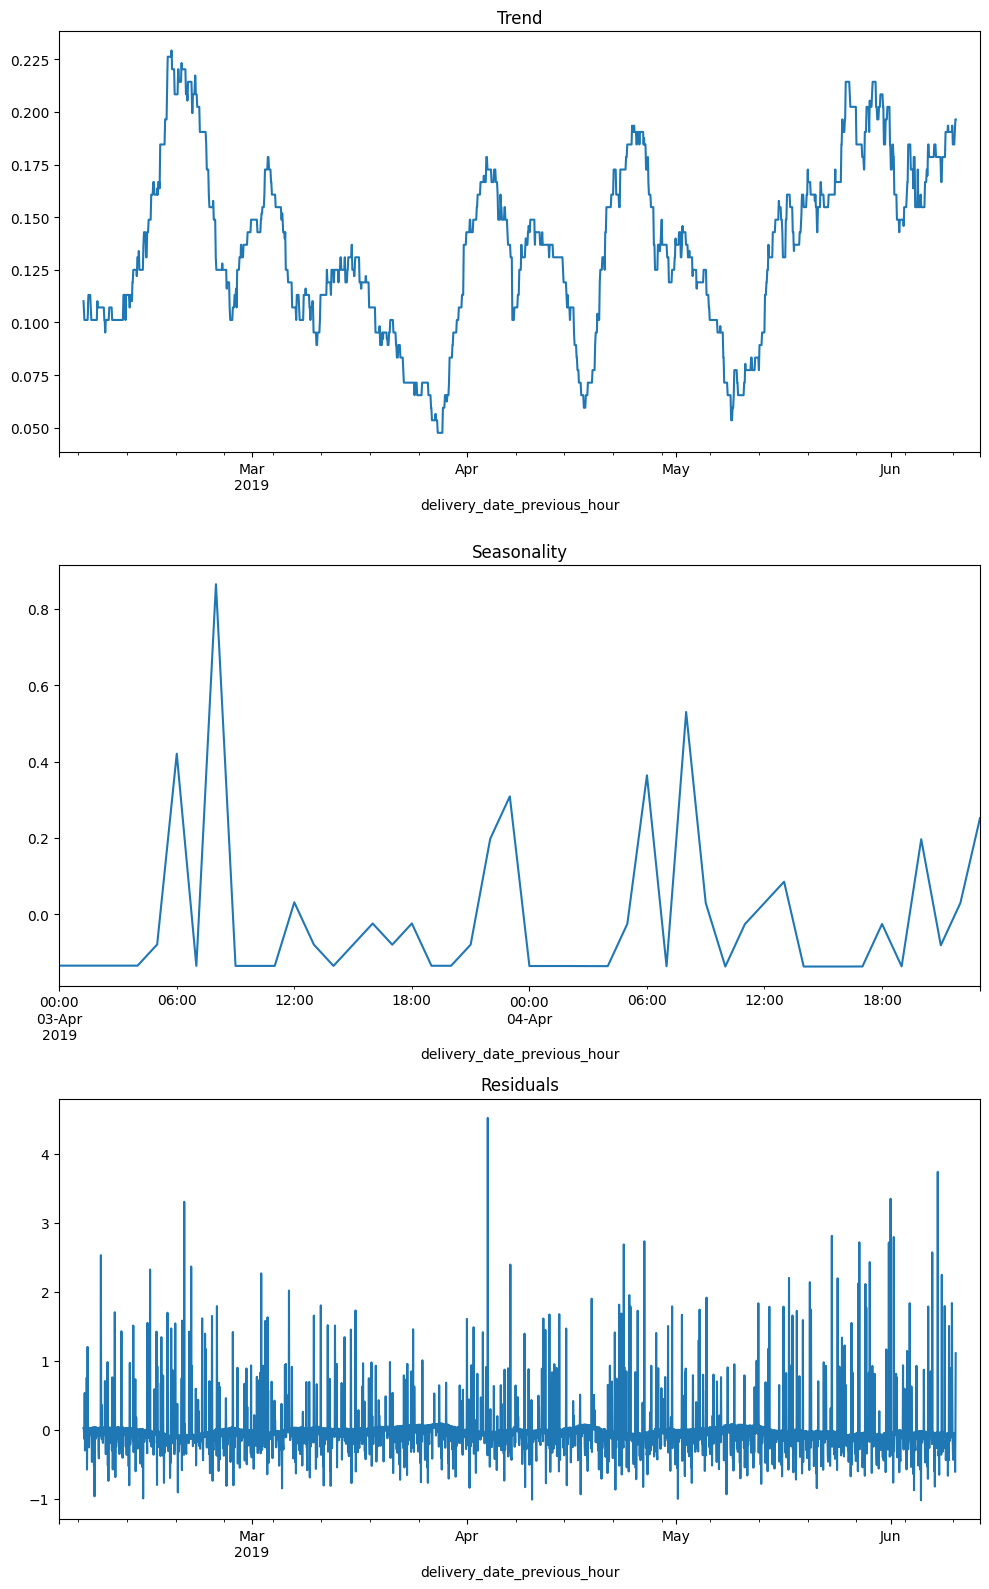

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(time_analysis['orders_shipped'], period=24*7)

plt.figure(figsize=(10, 16))
plt.subplot(311)

decompose.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decompose.seasonal['2019-04-03':'2019-04-04'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decompose.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

####1. Тренд (Trend):
С февраля по июнь 2019 года наблюдаются регулярные колебания. Основные пики приходятся на начало марта, апрель и конец мая. Это может указывать на временные колебания спроса или поставок, которые связаны с бизнес-процессами. Важно заметить, что тренд восстанавливается после падения в апреле и продолжает расти к июню, т.е. запустить доставку сейчас будет оптимальным решением.
####2. Сезонность (Seasonality):
В течение дня наблюдаются регулярные изменения в данных. Пики сезонности указывают на периоды активности, а минимумы — на периоды затишья. Необходимо обратить внимание на скачки, которые происходят в утренние и вечерние часы, это может быть связано с рабочим графиком сотрудников и логистическими процессами компании.
####3. Остатки (Residuals):
Остатки демонстрируют случайные колебания, которые не объясняются трендом и сезонностью. Видно, что остатки имеют высокую волатильность и некоторые выбросы. Некоторые выбросы, например, в начале апреля и конце мая, могут быть результатом аномальных событий или ошибок данных.


##Итоговый вывод:

Поступило небольшое количество данных. Данные хорошего качества, пропусков и дублей нет. В датасете содержатся данные за <b>период с 2019-02-01 по 2019-06-13</b>.

- Медианное значение стоимости отгруженного товара <b>4 210.8</b>
- Медианное значение стоимости доставки заказов <b>2 579.5</b>

Самый большой район по объему (стоимость отгруженных товаров + стоимость доставки заказов): 111115 – <b>1 758 532</b>

При том, в этом же районе самый низникй процент недоставленных товаров - <b>12.7%</b>

Процент итоговой стоимости заказов с доставкой в 111115 район самый большой и составляет <b>47,3%</b> от общей стоимости заказов с доставкой во все районы.

- Данные показывают наличие выраженного тренда с регулярными колебаниями. </b>Запустить доставку сейчас будет оптимальным решением, так как тренд растущий.</b>
- Периодическая сезонность указывает на повторяющиеся циклы в течение дня, можно заметить, что отправка основной массы заказов происходят в утренние и вечерние часы, возможно связано с внутренними процессами организации.

Учитывая изложенные факты, <b>оптимальным решением будет начать расширение с района под индексом 111115</b>.
